<a href="https://colab.research.google.com/github/DGuilherme/PMTese/blob/main/CMAPSS_Feature_Selection_AllDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📦 Install dependencies
!pip install -q boruta scikit-learn pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.8 MB/s eta 0:00:00


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

column_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 22)]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt/train_FD001.txt', delim_whitespace=True, header=None)
test_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD001.txt/test_FD001.txt', delim_whitespace=True, header=None)
rul_data_FD001 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD001.txt/RUL_FD001.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD002.txt/train_FD002.txt', delim_whitespace=True, header=None)
test_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD002.txt/test_FD002.txt', delim_whitespace=True, header=None)
rul_data_FD002 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD002.txt/RUL_FD002.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD003.txt/train_FD003.txt', delim_whitespace=True, header=None)
test_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD003.txt/test_FD003.txt', delim_whitespace=True, header=None)
rul_data_FD003 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD003.txt/RUL_FD003.txt', delim_whitespace=True, header=None)

# Load the dataset
# /content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD001.txt
train_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/train_FD004.txt/train_FD004.txt', delim_whitespace=True, header=None)
test_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/test_FD004.txt/test_FD004.txt', delim_whitespace=True, header=None)
rul_data_FD004 = pd.read_csv('/content/drive/MyDrive/Python/predictive-maintenance-main/datasets/cmapss/RUL_FD004.txt/RUL_FD004.txt', delim_whitespace=True, header=None)

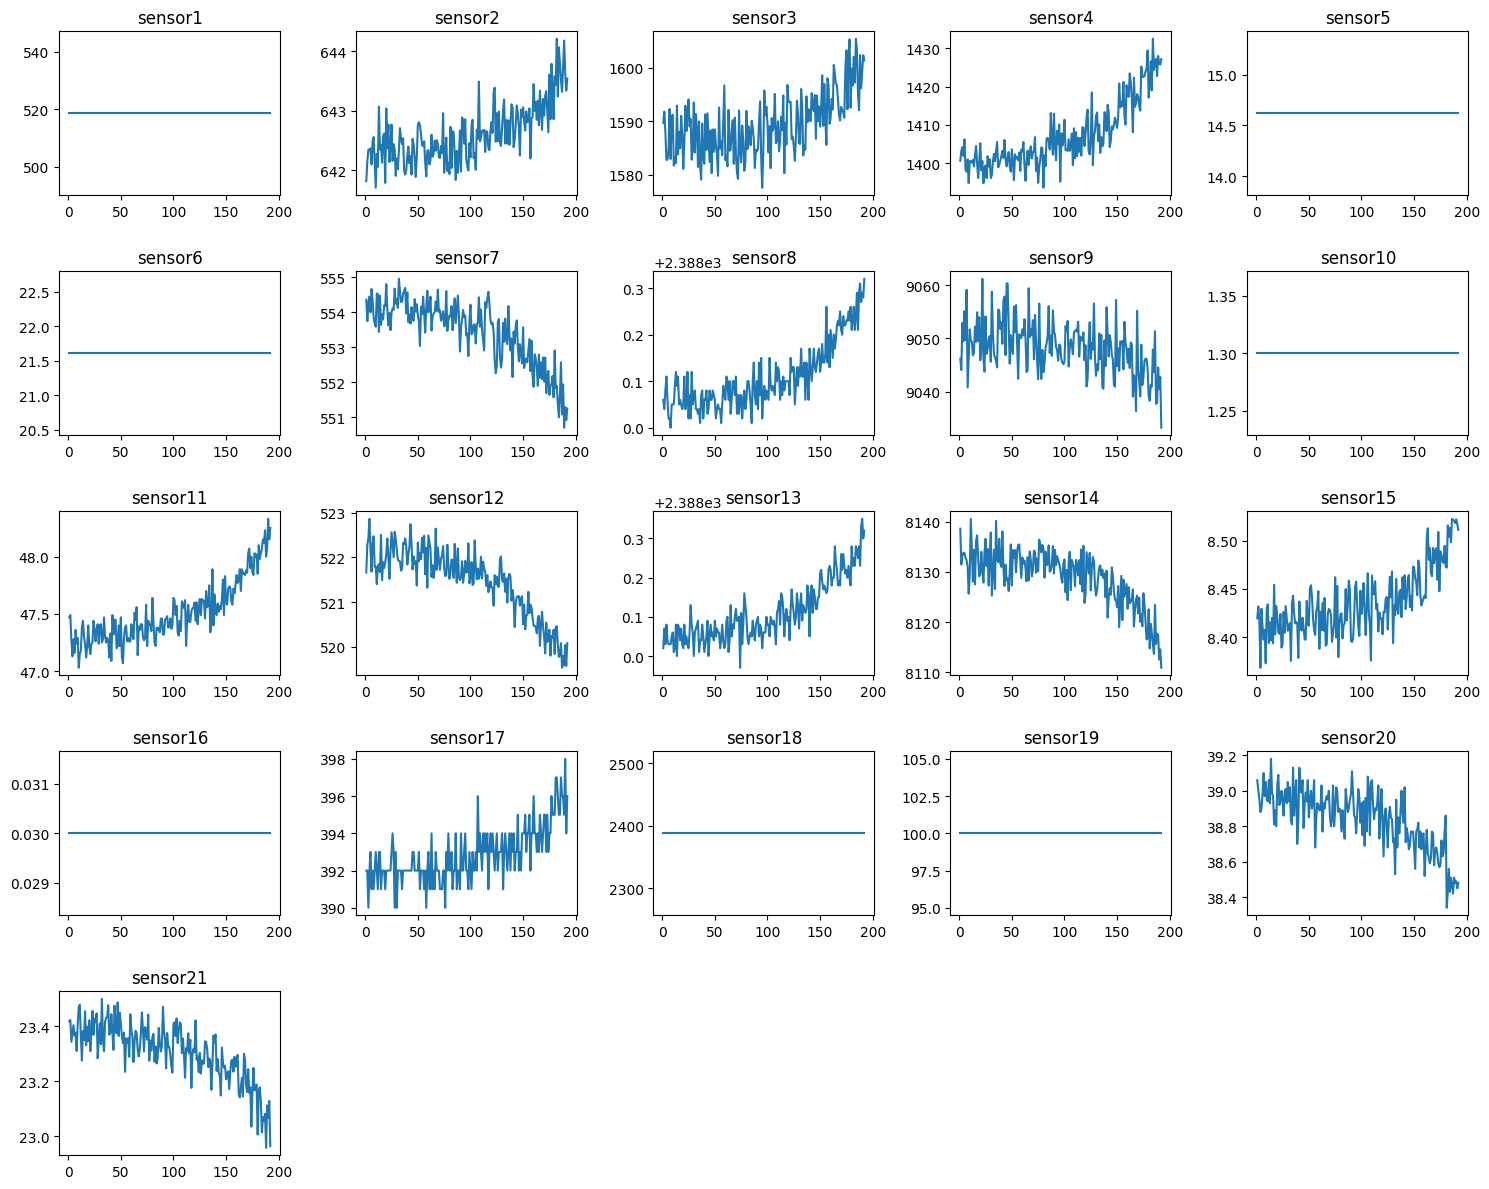

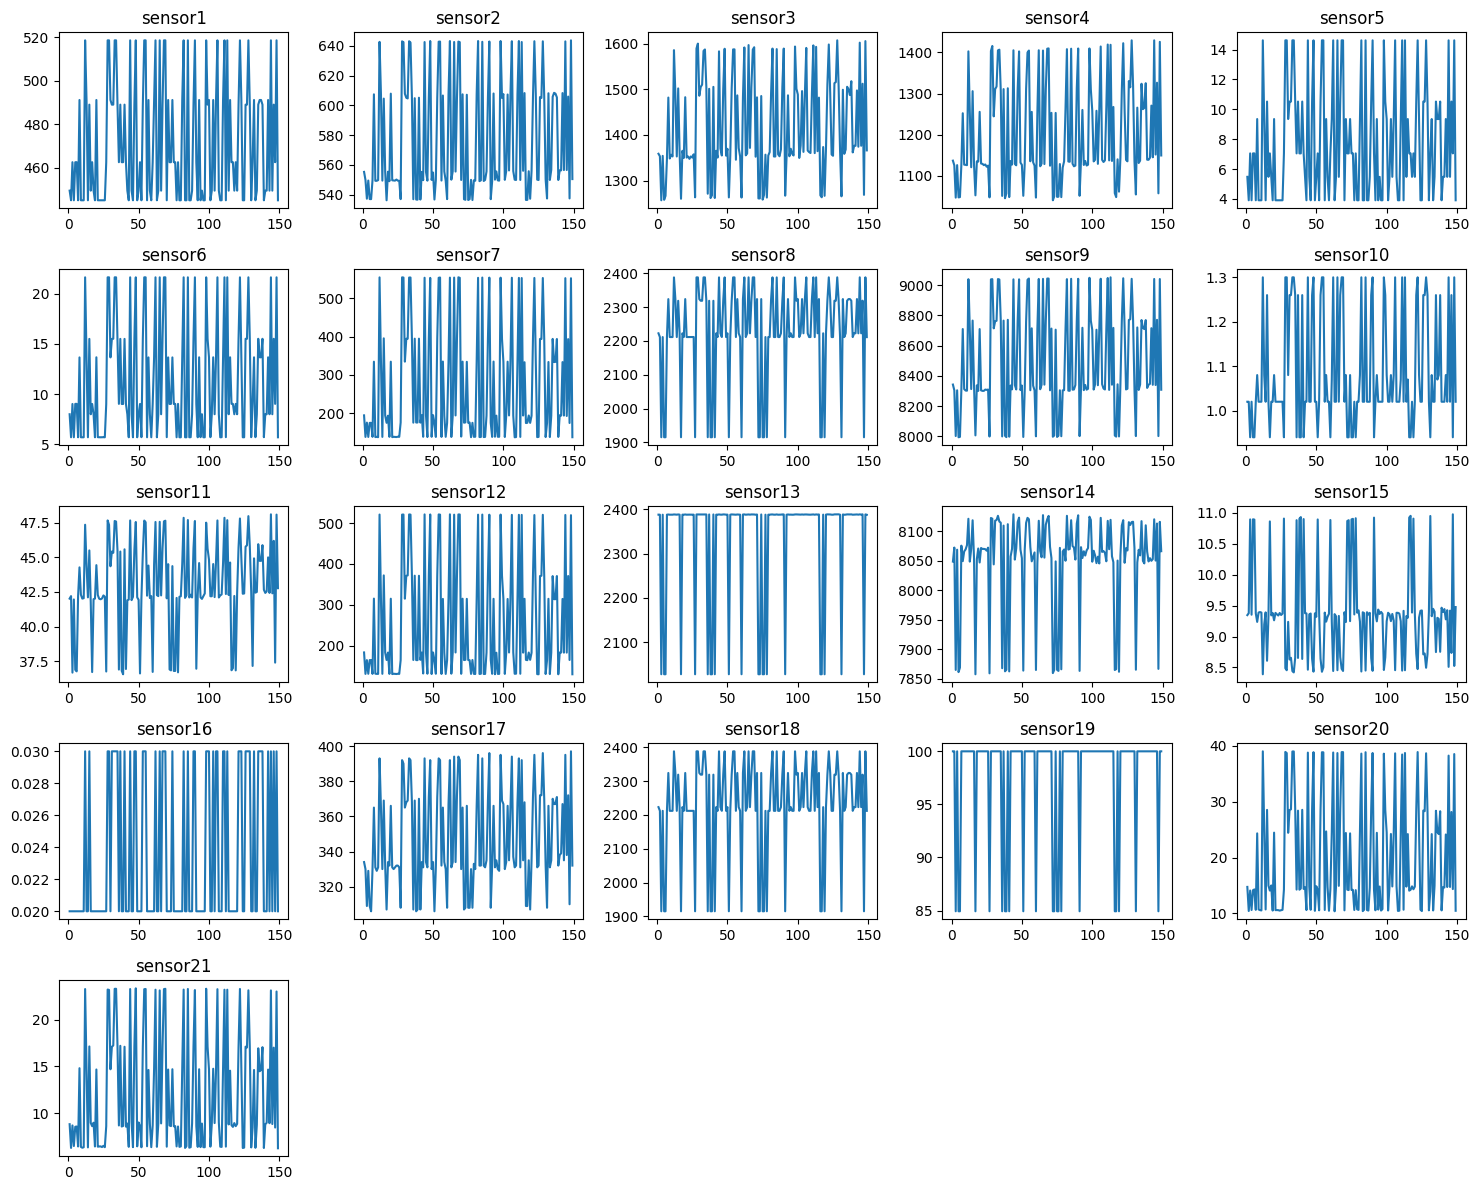

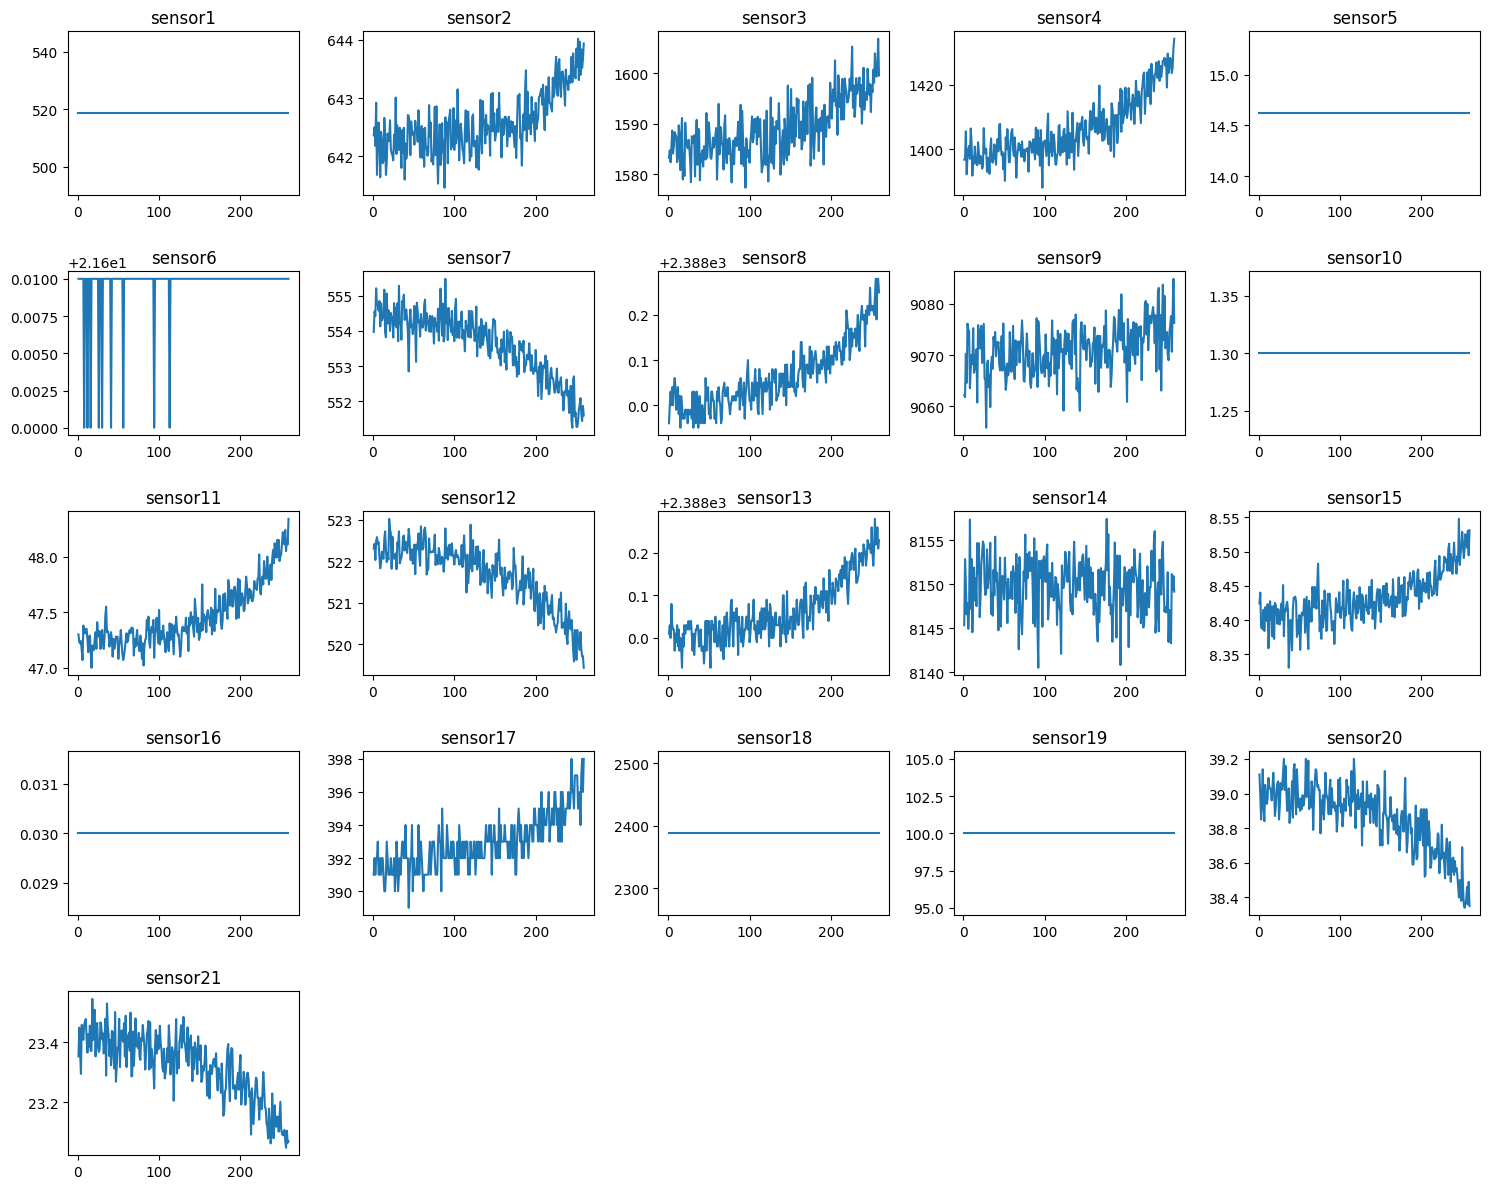

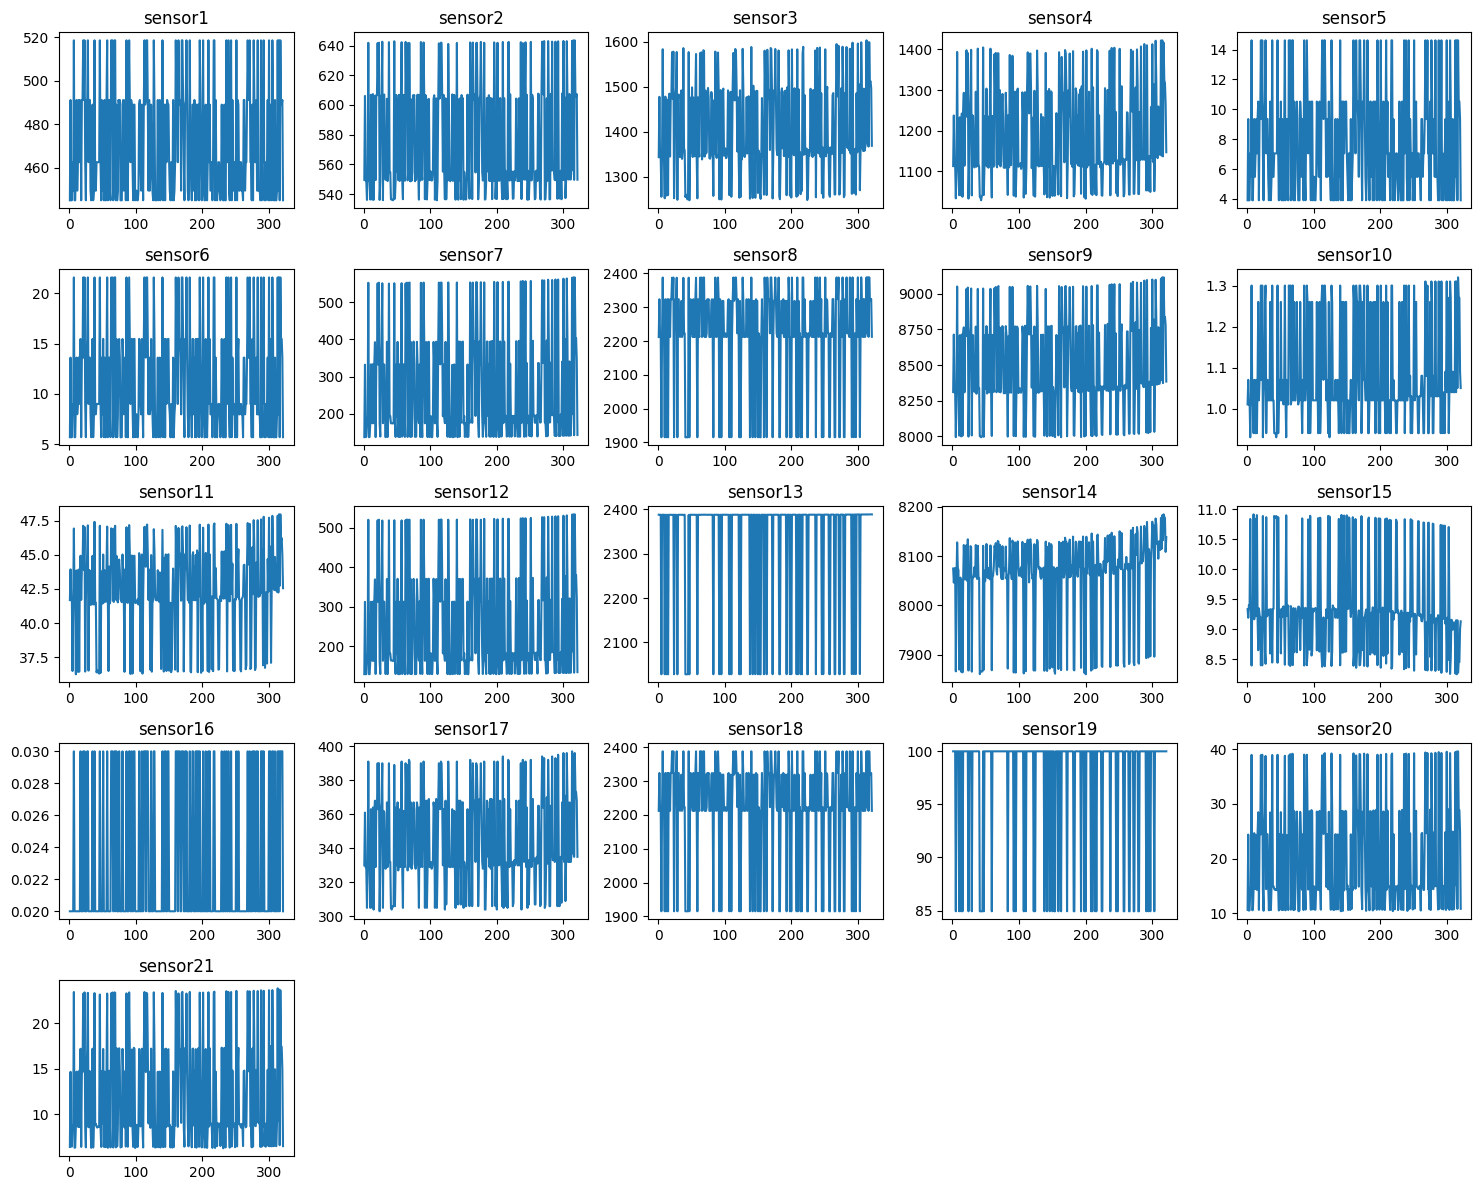

In [37]:
for dataset_num in range(1, 5):
  train_data_var = f"train_data_FD00{dataset_num}"
  test_data_var = f"test_data_FD00{dataset_num}"
  rul_data_var = f"rul_data_FD00{dataset_num}"

  # Access the DataFrames using globals() and assign column names
  globals()[train_data_var].columns = column_names
  globals()[test_data_var].columns = column_names
  globals()[rul_data_var].columns = ['RUL']

  engine_id = 1
  engine_data = globals()[train_data_var][globals()[train_data_var]['id'] == engine_id]

  plt.figure(figsize=(15, 12))
  for i in range(5, globals()[train_data_var].shape[1]):
      plt.subplot(5, 5, i-4)
      plt.plot(engine_data['cycle'], engine_data.iloc[:, i])
      plt.title(globals()[train_data_var].columns[i])
  plt.tight_layout()
  plt.show()

In [38]:
features = train_data_FD002.drop(columns=['id', 'cycle'])

selector = VarianceThreshold(threshold=0.001)
selector.fit(features)

# Keep track of low-variance features
low_variance_features = features.columns[~selector.get_support()].tolist()
filtered_df = pd.DataFrame(selector.transform(features), columns=features.columns[selector.get_support()])

# Step 2: Correlation filtering
corr = filtered_df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

# Final selected features
final_features = filtered_df.drop(columns=high_corr_features).columns.tolist()

# Step 3: Print reasons
print("\n✅ Selected features after filtering:")
print(final_features)

print("\n❌ Dropped due to low variance:")
print(low_variance_features)

print("\n❌ Dropped due to high correlation (> 0.95):")
for col in high_corr_features:
    corr_with = upper[col][upper[col] > 0.95].idxmax()
    print(f"{col} (highly correlated with {corr_with}, corr={upper[col][corr_with]:.2f})")


✅ Selected features after filtering:
['setting1', 'setting2', 'setting3', 'sensor2', 'sensor8', 'sensor14']

❌ Dropped due to low variance:
['sensor16']

❌ Dropped due to high correlation (> 0.95):
sensor1 (highly correlated with setting1, corr=0.96)
sensor3 (highly correlated with sensor2, corr=0.98)
sensor4 (highly correlated with sensor3, corr=0.99)
sensor5 (highly correlated with setting1, corr=0.99)
sensor6 (highly correlated with sensor5, corr=1.00)
sensor7 (highly correlated with sensor6, corr=0.99)
sensor9 (highly correlated with sensor3, corr=1.00)
sensor10 (highly correlated with sensor4, corr=0.96)
sensor11 (highly correlated with sensor8, corr=0.97)
sensor12 (highly correlated with sensor7, corr=1.00)
sensor13 (highly correlated with setting3, corr=1.00)
sensor15 (highly correlated with sensor8, corr=0.97)
sensor17 (highly correlated with sensor3, corr=1.00)
sensor18 (highly correlated with sensor8, corr=1.00)
sensor19 (highly correlated with setting3, corr=1.00)
sensor20 

In [39]:
# 🌲 Boruta Feature Selection
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# Target: create dummy RUL as max cycle - cycle (for example)
train_data_FD002['RUL'] = train_data_FD002.groupby('id')['cycle'].transform(max) - train_data_FD002['cycle']

X = train_data_FD002.drop(columns=['id', 'cycle', 'RUL'])
y = train_data_FD002['RUL'].values

# RandomForest for Boruta
forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(forest, n_estimators='auto', random_state=42)

# Fit Boruta
boruta_selector.fit(X.values, y)

# Show selected features
selected_features = X.columns[boruta_selector.support_].tolist()
print("Selected features with Boruta:", selected_features)

Selected features with Boruta: ['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor21']


In [17]:
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(boruta_selector.support_)):
    if boruta_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", boruta_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", boruta_selector.ranking_[i])


------Support and Ranking for each feature------
Doesn't pass the test:  setting1  - Ranking:  4
Doesn't pass the test:  setting2  - Ranking:  5
Doesn't pass the test:  setting3  - Ranking:  11
Doesn't pass the test:  sensor1  - Ranking:  11
Passes the test:  sensor2  - Ranking:  1
Passes the test:  sensor3  - Ranking:  1
Passes the test:  sensor4  - Ranking:  1
Doesn't pass the test:  sensor5  - Ranking:  11
Doesn't pass the test:  sensor6  - Ranking:  7
Passes the test:  sensor7  - Ranking:  1
Doesn't pass the test:  sensor8  - Ranking:  3
Passes the test:  sensor9  - Ranking:  1
Doesn't pass the test:  sensor10  - Ranking:  11
Passes the test:  sensor11  - Ranking:  1
Passes the test:  sensor12  - Ranking:  1
Doesn't pass the test:  sensor13  - Ranking:  2
Passes the test:  sensor14  - Ranking:  1
Passes the test:  sensor15  - Ranking:  1
Doesn't pass the test:  sensor16  - Ranking:  11
Doesn't pass the test:  sensor17  - Ranking:  6
Doesn't pass the test:  sensor18  - Ranking:  11

In [40]:
# Compute variance for all features
variances = features.var()

# Get variance for a specific sensor, e.g., sensor_9
sensor_name = 'sensor16'
print(f"Variance of {sensor_name}: {variances[sensor_name]:.6f}")

Variance of sensor16: 0.000022
